In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sajad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sajad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

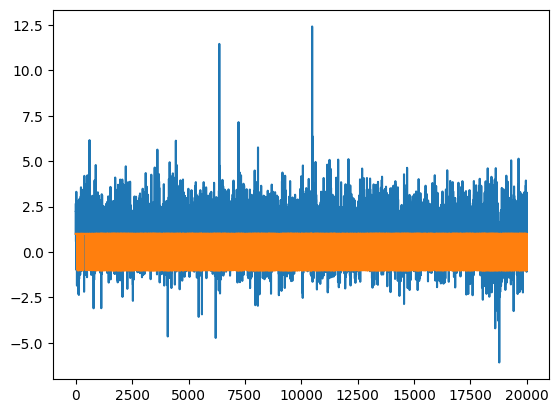

In [30]:
data = pd.read_csv('Amazon_DataSet.csv')
dfofdata = pd.DataFrame(data)
sentimentanalyzer = SentimentIntensityAnalyzer()
for index , row in dfofdata.iterrows() :
    if row['Sentiment'] == 'Positive' :
        row['Sentiment'] = 1
    elif row['Sentiment'] == 'Negative' :
        row['Sentiment'] = -1
for index , row in dfofdata.iterrows() :
    txt = row['reviewText']
    tokens = nltk.word_tokenize(txt)
    sentiments = []
    for token in tokens :
        sentiment = sentimentanalyzer.polarity_scores(token)
        sentiments.append(sentiment['compound'])
    overall = 0
    for i in sentiments :
        overall += i
    row['reviewText'] = overall
plt.plot(dfofdata)
plt.show()

In [31]:
data['Sentiment'] = data['Sentiment'].astype('int')
data['reviewText'] = data['reviewText'].astype('float')
X = np.asarray(data['reviewText']).reshape(-1,1)
y = np.asarray(data['Sentiment'])
X = preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_test.shape)
print(y_train.shape)

(4000, 1)
(16000,)


In [32]:
model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print("Accuracy:", accuracy)

Accuracy: 0.814


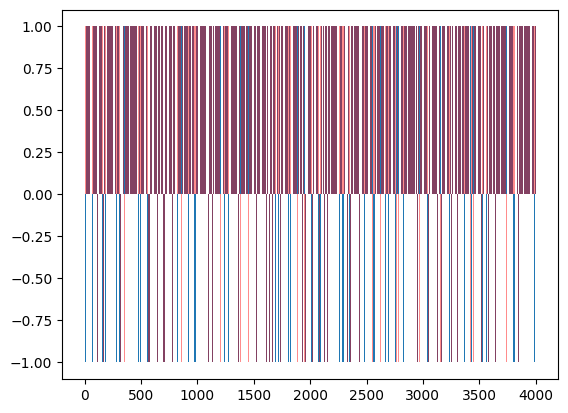

In [33]:
plt.bar(np.arange(4000),y_test)
plt.bar(np.arange(4000), yhat, alpha =0.45 , color='red')
plt.show()